In [2]:
import pandas as pd
twitter_train = pd.read_csv("twitter_training.csv", header=None)
twitter_test = pd.read_csv("twitter_validation.csv", header=None)

In [3]:
twitter_train.columns = ['ID', 'Entity', 'Sentiment', 'Text']
twitter_test.columns = ['ID', 'Entity', 'Sentiment', 'Text']

In [4]:
twitter_train.columns

Index(['ID', 'Entity', 'Sentiment', 'Text'], dtype='object')

In [5]:
twitter_train['Sentiment'].value_counts() #value_counts will count each category in a column

,count
Sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [6]:
twitter_train['label']=twitter_train['Sentiment'].replace('Irrelevant','Neutral')

In [7]:
twitter_train=twitter_train.drop('Sentiment',axis=1)  #axis=1 means column

In [8]:
twitter_train.head()

,ID,Entity,Text,label
0,2401,Borderlands,im getting on borderlands and i will murder yo...,Positive
1,2401,Borderlands,I am coming to the borders and I will kill you...,Positive
2,2401,Borderlands,im getting on borderlands and i will kill you ...,Positive
3,2401,Borderlands,im coming on borderlands and i will murder you...,Positive
4,2401,Borderlands,im getting on borderlands 2 and i will murder ...,Positive


In [9]:
twitter_train['Text']=twitter_train['Text'].str.lower()
twitter_test['Text']=twitter_test['Text'].str.lower () #.lower() converts to lowecase

In [10]:
twitter_train['Text'].head()

,Text
0,im getting on borderlands and i will murder yo...
1,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...


In [11]:
import re #re, aka regex(regular expressions) is used to remove special characters
def clean_text(text):
    if pd.isnull(text):
        return ""
    text=str(text)
    text=text.lower()
    text=re.sub(r'https\S+', '', text) #remove URLs #r means treat it as raw text #\S+ mtches everything after https and before a whitespace
    text=re.sub(r'@\w+','',text) #remove mentions
    text=re.sub(r'#','',text) #remove hashtag symbol
    text=re.sub(r'[^a-zA-Z\s]', '' , text) #remove special characters
    text=re.sub(r'\s+', ' ', text).strip() #remove empty spaces
    return text
twitter_train['Text']=twitter_train['Text'].apply(clean_text)
twitter_test['Text']=twitter_test['Text'].apply(clean_text)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer #this vectorizer turns the words into numbers the model can understand

In [13]:
tfidf=TfidfVectorizer(max_features=5000, stop_words='english') #max features will choose the most important words (5000 word in our case), stop words engish will remove the stop words known in english language

In [14]:
x_train=twitter_train['Text']
y_train=twitter_train['label']
x_test=twitter_test['Text']
y_test=twitter_test['Sentiment']

x_train = x_train.fillna("")
x_test  = x_test.fillna("")

In [15]:
Xtrain_tfidf=tfidf.fit_transform(x_train) #.fit is used in training only, since we want to make the model learn new words

In [16]:
Xtest_tfidf=tfidf.transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression #we use LR model since it's a good starting point for multiple class classification, this model is a classification model not regression
model=LogisticRegression(max_iter=1000)

In [18]:
model.fit(Xtrain_tfidf, twitter_train['label'])

LogisticRegression(max_iter=1000)

In [19]:
Y_prediction=model.predict(Xtest_tfidf)

In [20]:
from sklearn.metrics import accuracy_score
print('Validation Accuracy:',accuracy_score(y_test,Y_prediction))

Validation Accuracy: 0.685


In [21]:
from sklearn.metrics import classification_report, confusion_matrix #those are just some additional details beyond accuracy, they give insights about how well our model performed in each category or class

In [22]:
print('Classification report:', classification_report(y_test, Y_prediction, zero_division=0))

Classification report:               precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00       172
    Negative       0.79      0.83      0.81       266
     Neutral       0.54      0.85      0.66       285
    Positive       0.83      0.81      0.82       277

    accuracy                           0.69      1000
   macro avg       0.54      0.62      0.57      1000
weighted avg       0.59      0.69      0.63      1000



In [23]:
print('Confusion matrix:', confusion_matrix(y_test, Y_prediction))

Confusion matrix: [[  0  19 136  17]
 [  0 221  34  11]
 [  0  25 241  19]
 [  0  16  38 223]]


In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
naivebayes=MultinomialNB()
naivebayes.fit(Xtrain_tfidf, y_train)

MultinomialNB()

In [26]:
y_nb_predict=naivebayes.predict(Xtest_tfidf)

In [27]:
print('The accuracy achieved by Naive Bayes algorithm is:', accuracy_score(y_test,y_nb_predict))
print('Below is a classification report of NB algorithm:', classification_report(y_test, y_nb_predict, zero_division=0))
print('The confusion matrix:', confusion_matrix(y_test, y_nb_predict))

The accuracy achieved by Naive Bayes algorithm is: 0.63
Below is a classification report of NB algorithm:               precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00       172
    Negative       0.73      0.77      0.75       266
     Neutral       0.49      0.80      0.61       285
    Positive       0.77      0.71      0.74       277

    accuracy                           0.63      1000
   macro avg       0.50      0.57      0.52      1000
weighted avg       0.55      0.63      0.58      1000

The confusion matrix: [[  0  21 130  21]
 [  0 204  46  16]
 [  0  35 228  22]
 [  0  21  58 198]]


In [28]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=100, random_state=42)

In [29]:
randomforest.fit(Xtrain_tfidf, y_train)

y_predict_rf=randomforest.predict(Xtest_tfidf)

In [30]:
print('The accuracy achieved Random Forest algorithm is:', accuracy_score(y_test,y_predict_rf))
print('Below is a classification report of RF algorithm:', classification_report(y_test, y_predict_rf, zero_division=0))
print('The confusion matrix:', confusion_matrix(y_test, y_predict_rf))

The accuracy achieved Random Forest algorithm is: 0.796
Below is a classification report of RF algorithm:               precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00       172
    Negative       0.96      0.97      0.96       266
     Neutral       0.60      0.98      0.74       285
    Positive       0.98      0.94      0.96       277

    accuracy                           0.80      1000
   macro avg       0.63      0.72      0.67      1000
weighted avg       0.70      0.80      0.73      1000

The confusion matrix: [[  0   2 167   3]
 [  0 257   9   0]
 [  0   4 279   2]
 [  0   4  13 260]]


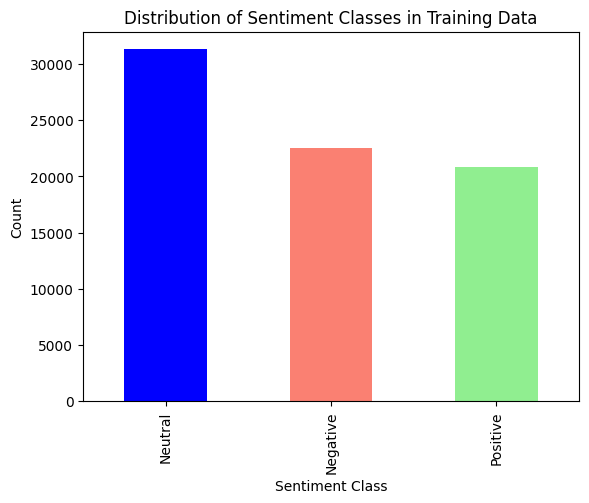

In [34]:
import matplotlib.pyplot as plt
y_train.value_counts().plot(kind='bar', color=['blue', 'salmon', 'lightgreen', 'gray'])
plt.title('Distribution of Sentiment Classes in Training Data')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

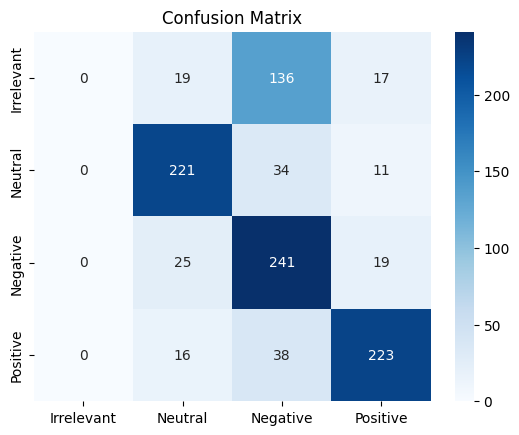

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title('Confusion Matrix')

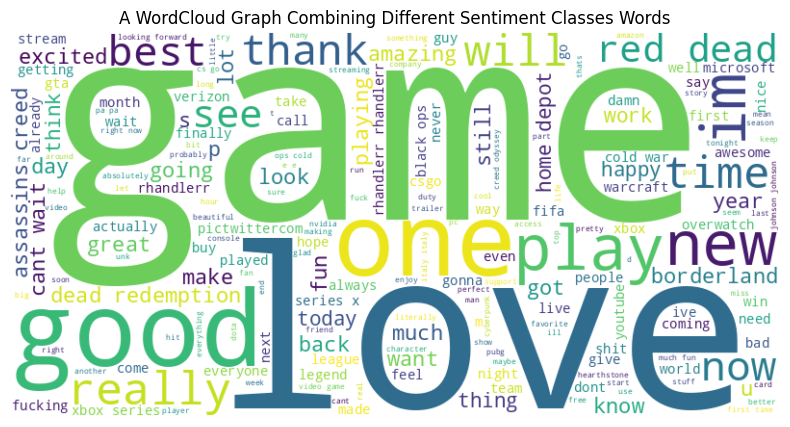

In [44]:
from operator import neg
from wordcloud import WordCloud
positive="".join(x_train[y_train=='Positive'])
negative="".join(x_train[y_train=='Negative'])
neutral="".join(x_train[y_train=='Neutral'])
wordcloud=WordCloud(width=800, height=400, background_color='white').generate(positive)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('A WordCloud Graph Combining Different Sentiment Classes Words')
plt.show()

In [40]:
LR_accuracy=accuracy_score(y_test,Y_prediction)
NB_accuracy=accuracy_score(y_test,y_nb_predict)
RF_accuracy=accuracy_score(y_test,y_predict_rf)

In [41]:
models=['Logistic Regression', 'Naive Bayes', 'Random Forest']
accuracies=[LR_accuracy, NB_accuracy, RF_accuracy]

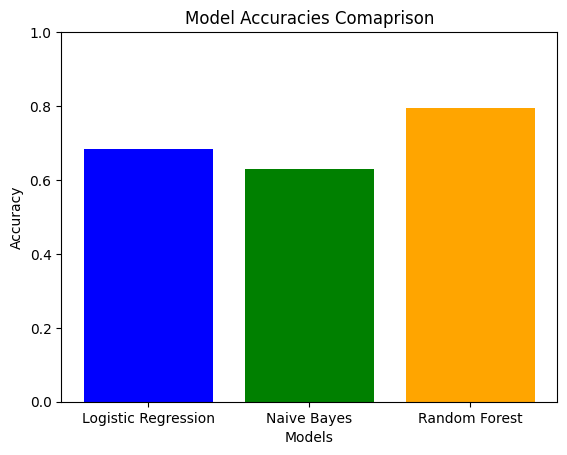

In [42]:
plt.bar(models, accuracies, color=['blue','green','orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comaprison')
plt.ylim(0,1) #Accuracy is always between 0 and 1
plt.show()